In [115]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as sk
import scipy.stats as stats
pd.set_option('display.width', 500)

Marketo
Length:  484547 
Unique Ids:  484547
Mean Delivered:  14.4989092905
Mean Opened:  6.4302696702
Mean Clicked:  5.90331836327
Mean Delivered (distinct):  13.1574336442
Mean Opened (distinct):  2.58179289109
Mean Clicked (distinct):  0.426220779408
Mean Open Rate: 17.1%
Mean Click Rate: 2.7%


Marketo
Length:  193819 
Unique Ids:  193819
Mean Delivered:  18.7206672204
Mean Opened:  6.45133862005
Mean Clicked:  6.14905866454
Mean Delivered (distinct):  17.2642981338
Mean Opened (distinct):  6.45059565884
Mean Clicked (distinct):  0.943911587615
Mean Open Rate: 42.7%
Mean Click Rate: 4.9%


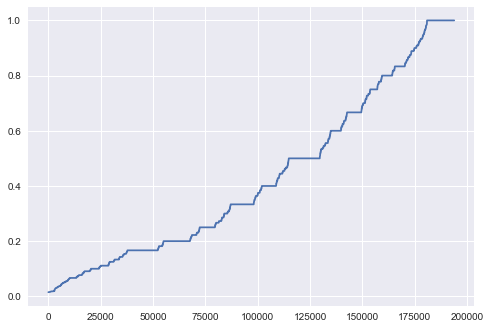

In [130]:
marketo = pd.DataFrame(pd.read_csv('/Users/JackShipway/Desktop/Joined/marketo.csv'))

print 'Marketo\n', 'Length: ', len(marketo), '\nUnique Ids: ', len(pd.unique(marketo['WhamContactId']))
print 'Mean Delivered: ', np.mean(marketo['Delivered'])
print 'Mean Opened: ', np.mean(marketo['Opened'])
print 'Mean Clicked: ', np.mean(marketo['Clicked'])
print 'Mean Delivered (distinct): ', np.mean(marketo['DeliverDistinct'])
print 'Mean Opened (distinct): ', np.mean(marketo['OpenDistinct'])
print 'Mean Clicked (distinct): ', np.mean(marketo['ClickDistinct'])
print 'Mean Open Rate: %s%%' % np.round(np.multiply(np.mean(marketo['OpenRate']), 100), 1)
print 'Mean Click Rate: %s%%' % np.round(np.multiply(np.mean(marketo['ClickRate']), 100), 1)

sorted_all = marketo.sort_values('OpenRate').reset_index()
top_40 = sorted_all.loc[int(len(marketo) * 0.6):, :].reset_index()
# stats.probplot(top_50['OpenRate'], dist='norm', plot=plt)
plt.plot(range(len(top_40)), top_40['OpenRate'])


print 'Marketo\n', 'Length: ', len(top_40), '\nUnique Ids: ', len(pd.unique(top_40['WhamContactId']))
print 'Mean Delivered: ', np.mean(top_40['Delivered'])
print 'Mean Opened: ', np.mean(top_40['Opened'])
print 'Mean Clicked: ', np.mean(top_40['Clicked'])
print 'Mean Delivered (distinct): ', np.mean(top_40['DeliverDistinct'])
print 'Mean Opened (distinct): ', np.mean(top_40['OpenDistinct'])
print 'Mean Clicked (distinct): ', np.mean(top_40['ClickDistinct'])
print 'Mean Open Rate: %s%%' % np.round(np.multiply(np.mean(top_40['OpenRate']), 100), 1)
print 'Mean Click Rate: %s%%' % np.round(np.multiply(np.mean(top_40['ClickRate']), 100), 1)

In [124]:
salesforce = pd.DataFrame(pd.read_csv('/Users/JackShipway/Desktop/Joined/salesforce.csv'))
wham_to_sf = pd.DataFrame(pd.read_csv('/Users/JackShipway/Desktop/Joined/whamtosf.csv'))
sf_wham = salesforce.merge(wham_to_sf, on='SFAccountId', how='inner')
sf_ga = pd.DataFrame(sf_wham.merge(marketo, on='WhamContactId'))

print sum(salesforce['Price'])

557530938.92


In [117]:
salesforce = pd.DataFrame(pd.read_csv('/Users/JackShipway/Desktop/Joined/salesforce.csv'))

print len(pd.unique(salesforce['SFAccountId']))

10242


In [119]:
wham_to_sf = pd.DataFrame(pd.read_csv('/Users/JackShipway/Desktop/Joined/whamtosf.csv'))
print 'Wham\n', 'Number of Wham Ids: ', len(pd.unique(wham_to_sf['WhamContactId'])), '\nNumber of SF Accounts: ', len(pd.unique(wham_to_sf['SFAccountId']))

Wham
Number of Wham Ids:  22381 
Number of SF Accounts: 

 16681


In [128]:
ga = pd.DataFrame(pd.read_csv('/Users/JackShipway/Desktop/Joined/gabq.csv'))
print len(pd.unique(ga['WhamContactId']))
print len(pd.unique(ga['WhamAccountId']))


sys.exit()

70302
8510


SystemExit: 

In [121]:
a = marketo.merge(wham_to_sf, on='WhamContactId', how='inner')
b = a.merge(ga, on='WhamContactId', how='inner')
c = pd.DataFrame(b.merge(salesforce, on='SFAccountId', how='inner'))


c.to_csv('/Users/JackShipway/Desktop/Joined/data.csv', index=None)

In [122]:
data = pd.DataFrame(pd.read_csv('/Users/JackShipway/Desktop/Joined/data.csv'))

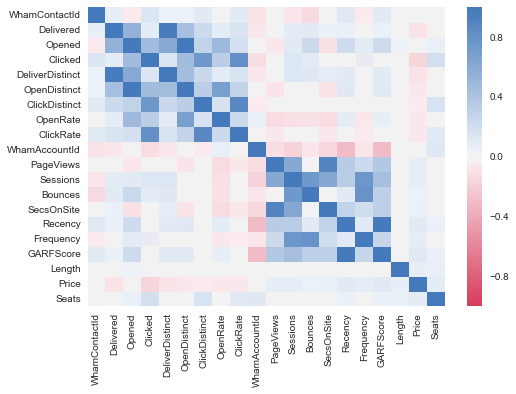

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(5, 250, as_cmap=True)
corr = data.corr()

sns.heatmap(corr, cmap=cmap)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

s = corr.abs().unstack()